## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/train.csv")

## Рассмотрим датасет по ближе

In [ ]:
df.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4


In [ ]:
df.shape

(13584, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

Заменим все пропуски в данных

In [ ]:
df = df.fillna(0)

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

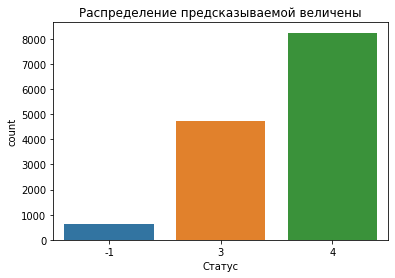

In [ ]:
sns.countplot(x = "Статус" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение года поступления')

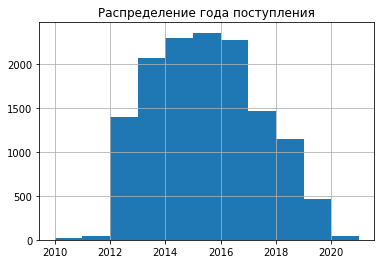

In [ ]:
df["Год_Поступления"].hist(bins = 11, range = [2010, 2021]).set_title('Распределение года поступления')

Взглянем на несколько величин сразу

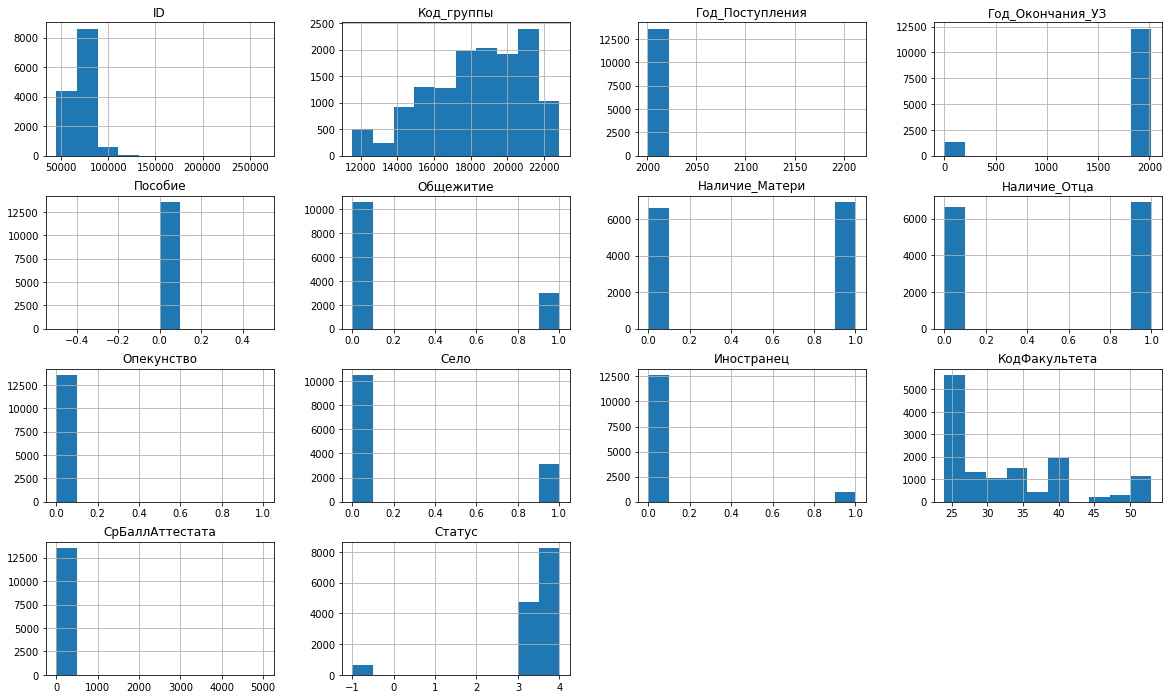

In [ ]:
_ = df[df.columns].hist(figsize=(20,12))

Обратим внимание на часть столбцов с постоянными значениями

In [ ]:
df["Пособие"].value_counts()

0.0    13584
Name: Пособие, dtype: int64

In [ ]:
df["Опекунство"].value_counts()

0.0    13578
1.0        6
Name: Опекунство, dtype: int64

In [ ]:
df.columns.values

array(['ID', 'Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение',
       'Где_Находится_УЗ', 'Год_Окончания_УЗ', 'Пособие', 'Страна_ПП',
       'Регион_ПП', 'Город_ПП', 'Общежитие', 'Наличие_Матери',
       'Наличие_Отца', 'Страна_Родители', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус'],
      dtype=object)

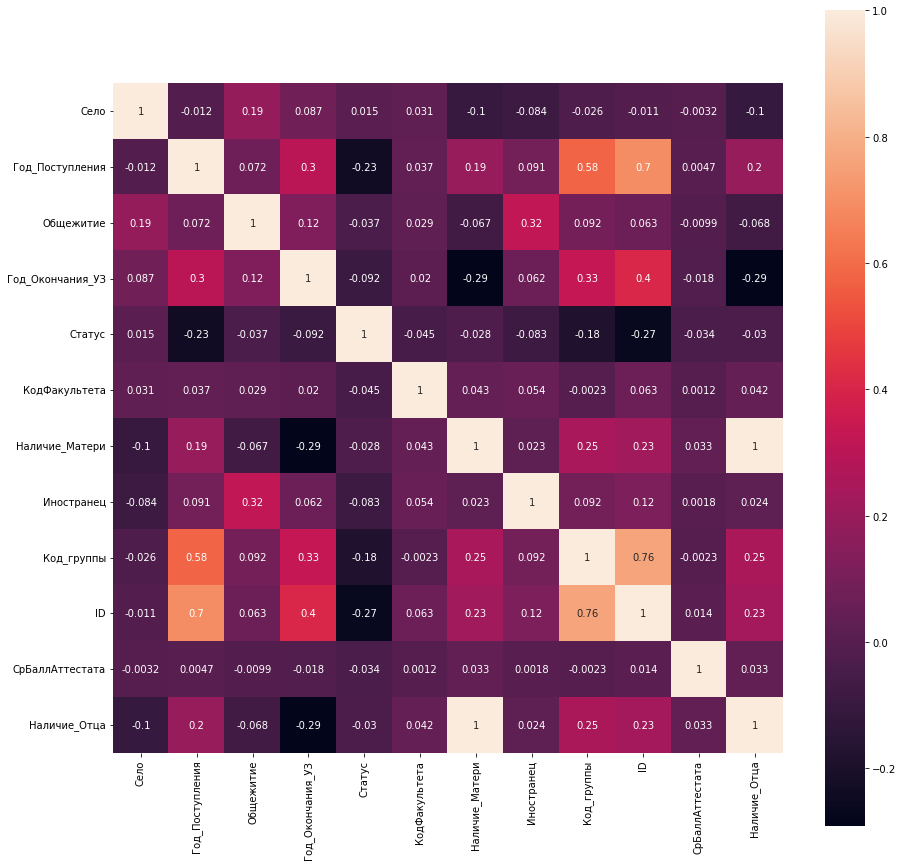

In [ ]:
plt.rcParams['figure.figsize']=(15,15)


df_corr = list(set(df.columns.values) - set(['Опекунство','Пособие']))
g = sns.heatmap(df[df_corr].corr(), square = True, annot=True)

## Выделим выборки

In [ ]:
df.dtypes[df.dtypes == "object"].index.values

array(['Пол', 'Основания', 'Изучаемый_Язык', 'Дата_Рождения',
       'Уч_Заведение', 'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП',
       'Город_ПП', 'Страна_Родители'], dtype=object)

Поместим все столбцы object в массив, для их дальнейшего удаления

In [ ]:
mass_object = df.dtypes[df.dtypes == "object"].index.values

In [ ]:
mass_object = np.append(mass_object, "Статус")

In [ ]:
X = df.drop(mass_object, axis = 1)
y = df[["Статус"]]

In [ ]:
X.shape

(13584, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [ ]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=0)

## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
y_test.head(3)

,Статус
1061,3
6482,3
10622,4


In [ ]:
f1_score(y_test, pred, average='macro', zero_division = 0)

0.7048314407654864

# Cоздание файла с ответом

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_submission = pd.read_csv("/content/submission.csv")

Провем те же манипуляции с данными что и на обучении

In [ ]:
mass_object = df.dtypes[df.dtypes == "object"].index.values
df_test = df_test.drop(mass_object, axis = 1)

In [ ]:
df_test = df_test.fillna(0)

In [ ]:
df_test_pred = clf.predict(df_test)

In [ ]:
df_submission["Статус"] = df_test_pred
df_submission.head(4)

,ID,Статус
0,64996,4
1,71837,4
2,86587,4
3,73673,3


In [ ]:
df_submission.to_csv("/content/submission.csv")